In [1]:
## EDIT:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/reanalysis/'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers
import time

import sys
sys.path.append(base_dir)
from utils import split_e3sm, split_obs
from exp_hp import get_hp

2025-01-31 13:04:53.162118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


### Load standardized E3SM

In [3]:
EXP_NAME = 'exp2'
# hps = get_hp(EXP_NAME)
# print('Training Members: '+str(hps['train_mems']))
# print('Validation Member: '+str(hps['val_mems'][0]))
# print('Testing Member: '+str(hps['test_mems'][0]))
# print('Lead: '+str(hps['LEAD']))
# print('Region: '+str(hps['region'][0])+'N x '+str(hps['region'][1])+'E')

# _, _, X1test, _, _, Y1test, inew = split_e3sm(trainmems = hps['train_mems'],
#                                                   valmem = hps['val_mems'][0],
#                                                   testmem = hps['test_mems'][0],
#                                                   months = [11,12,1,2], # months for X (Y+leadtime are accounted for in function)
#                                                   lead = hps['LEAD'])

EXP_NAME2 = 'exp2_allobs'
hps2 = get_hp(EXP_NAME2)
_, _, X1test, _, _, Y1test = split_obs(trainyrs=hps2['train_yrs'],
                                            valyrs=hps2['val_yrs'],
                                            testyrs=hps2['test_yrs'],
                                            months=[11,12,1,2],
                                            lead=hps2['LEAD'],
                                            latpt = hps2['region'][0],
                                            lonpt = hps2['region'][1])

X1test = X1test.reshape((X1test.shape[0],X1test.shape[1]*X1test.shape[2]))

GLOBAL_SEED = hps2['GLOBAL_SEED']
np.random.seed(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

### Test NN

0


2025-01-31 13:04:57.313652: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


101/101 [==============================] - 0s 1ms/step
1
101/101 [==============================] - 0s 897us/step
2
101/101 [==============================] - 0s 1ms/step
3
101/101 [==============================] - 0s 912us/step
4
101/101 [==============================] - 0s 979us/step
5
101/101 [==============================] - 0s 1ms/step
6
101/101 [==============================] - 0s 973us/step
7
101/101 [==============================] - 0s 1ms/step
8
101/101 [==============================] - 0s 992us/step
9
101/101 [==============================] - 0s 874us/step


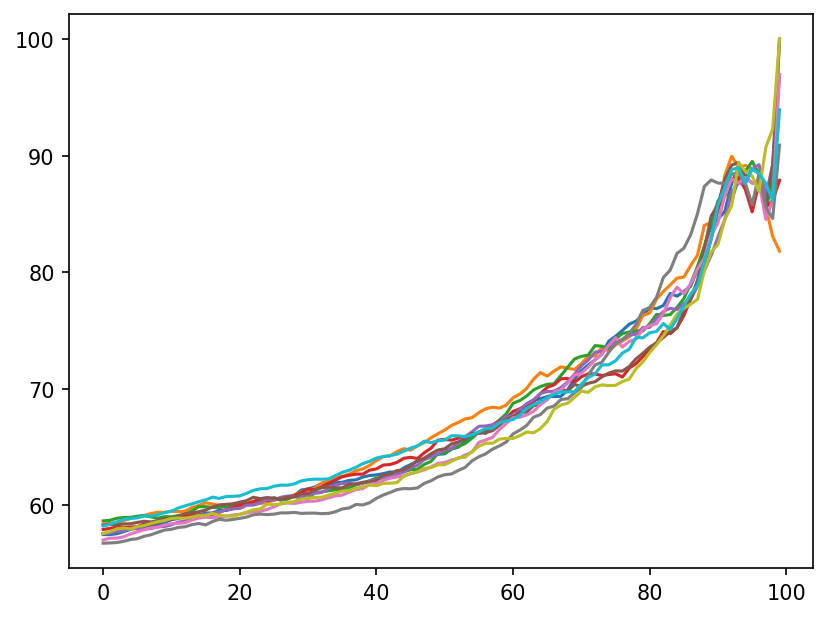

In [4]:
#----- SET UP & TRAIN NN -----
acc_all = []
for SEED in range(10):
    print(SEED)
    annfi_name = 'ann1_e3sm_'+EXP_NAME+'_seed'+str(SEED)+'.h5'
    ann = tf.keras.models.load_model(base_dir+'train/saved_models/'+annfi_name)
    
    pred = ann.predict(X1test)
    acc = []
    predconf = np.max(pred,axis=-1)
    predval  = np.argmax(pred,axis=-1)

    for q in range(100):
        iconf = np.where(predconf >= np.percentile(predconf,q=q))
        icorr = np.where(predval[iconf] == Y1test[iconf])
        
        acc.append((len(icorr[0])/len(iconf[0]))*100)
    plt.plot(acc)
    
    acc_all.append(acc)

# np.save(base_dir+'test/confvsacc/confvsacc_ann1_e3sm_'+EXP_NAME+'_10seeds.npy', acc_all, allow_pickle=True)
np.save(base_dir+'test/confvsacc/confvsacc_ann1_obs_'+EXP_NAME2+'.npy', acc_all, allow_pickle=True)